# Анализ параметров сделки продаж акций Apple

Задача: выявить зависимости между параметрами

Данные:

    • Deals count - Количество сделок за период
    • Buy count - Количество сделок с флагом buy (AggressorSide)
    • Sell count - Количество сделок с флагом sell 
    • %Buy count – в % количество сделок с флагом buy (AggressorSide) от общего числа сделок за период
    • Sell size - Сумма объемов сделок с флагом sell
    • Buy size - Сумма объемов сделок с флагом buy
    • Sum size – общая сумма объемов сделок (sizes) за период
    • %Buy size - в % Сумма объемов сделок с флагом buy от общей суммы объемов сделок за период
    • Min size - Минимальный объем сделки за период
    • Max size - Максимальный объем сделки за период
    • AVG size - Средний объем за период
    • Size dispersion - Дисперсия объема за период
    • Size deviation - Среднеквадратическое отклонение объема за период
    • Weighted average price - Средневзвешенная цена за период
    • %d(Weighted average price) – процент изменения средневзвешенной цены = (текущая цена – цена за предыдущий период)/ цена за предыдущий период
    • First price - Цена первой сделки в период
    • Max price – максимальная цена в период
    • Min price – минимальная цена в период
    • Last price - Цена последней сделки в период
    • %(max-min) - разница максимальной и минимальной цены в % относительно First price
    • %(last-first) - разница последней и первой цены в % относительно First price
    • AVG price - Средняя цена за период
    • %d(AVG price) - процент изменения средней цены = (текущая цена – цена за предыдущий период)/ цена за предыдущий период
    • Price dispersion - Дисперсия цены за период
    • Price deviation - Среднеквадратическое отклонение цены за период
    • Weighted average size - Средневзвешенный объем за период 
    • Count diff - Разница количества сделок с флагом buy минус количества сделок с флагом sell
    • Count diff sum- сумма параметров Count diff за все предыдущие периоды
    • Size diff - Разница объемов сделок с флагом buy минус объемы сделок с флагом sell
    • Size diff sum - сумма параметров Size diff за все предыдущие периоды



# 1. Изучение и предобработка данных

In [19]:
#импорт библиотек
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np

In [20]:
df = pd.read_excel('C:\projects\AAPL_TnS-5_min_analysis.xlsx') 
display(df.head())
print(df.duplicated().sum())

,Date,Deals count,Buy count,Sell count,%Buy count,Sell size,Buy size,Sum size,%Buy size,Min size,...,%(last-first),AVG price,%d(AVG price),Price dispersion,Price deviation,Weighted average size,Count diff,Count diff sum,Size diff,Size diff sum
0,2020-06-15 10Hours 0-5 Minutes,4778,2396,2382,50.146505,430562,406150,836712,48.541195,100,...,0.124067,336.160735,0.239429,0.096783,0.311100,175.118032,14,-4896,-24412,-1491320
1,2020-06-15 10Hours 05-10 Minutes,4694,2406,2288,51.256924,456114,398724,854838,46.643224,100,...,0.279738,337.004137,0.301798,0.081501,0.285484,182.108620,118,-6770,-57390,-1836002
2,2020-06-15 10Hours 10-15 Minutes,4336,2010,2326,46.356089,422810,349136,771946,45.228034,100,...,-0.287416,337.014907,0.254096,0.073572,0.271242,178.033271,-316,-5212,-73674,-1564994
3,2020-06-15 10Hours 15-20 Minutes,3430,1678,1752,48.921283,328606,335774,664380,50.539450,100,...,0.083205,336.377460,-0.189145,0.058400,0.241660,193.694019,-74,-5286,7168,-1557826
4,2020-06-15 10Hours 20-25 Minutes,3372,1492,1880,44.246738,331144,276132,607276,45.470593,100,...,-0.178168,336.508475,0.038949,0.083949,0.289739,180.104395,-388,-5674,-55012,-1612838


0


In [21]:
#приведем названия столбцов к нижнему регистру и заменим пробел нанижнее подчеркивание
df = df.reset_index()
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace("( )", "_")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       355 non-null    int64  
 1   date                        355 non-null    object 
 2   deals_count                 355 non-null    int64  
 3   buy_count                   355 non-null    int64  
 4   sell_count                  355 non-null    int64  
 5   %buy_count                  355 non-null    float64
 6   sell_size                   355 non-null    int64  
 7   buy_size                    355 non-null    int64  
 8   sum_size                    355 non-null    int64  
 9   %buy_size                   355 non-null    float64
 10  min_size                    355 non-null    int64  
 11  max_size                    355 non-null    int64  
 12  avg_size                    355 non-null    float64
 13  size_dispersion             355 non

В данных отсутствуют пропущенные значения и дубликаты. Типы данных верные, кроме даты и времени. 

# 2. Исследовательский анализ данных

Для дальнейшего анализа создадим новый датафрейм с данными без столбцов с процентами, отклонениями, дисперсиями, минимальными и максимальными значениями, а также средневзвешанные значения.

In [23]:
new_df = df.drop(['%buy_count', '%buy_size', 'min_size', 'max_size', 
                  'size_dispersion', 'size_deviation', 'weighted_average_price',
                  '%d(weighted_average_price)', 'min_price',
                  'max_price', '%(max-min)', '%(last-first)',
                  '%d(avg_price)', 'price_dispersion', 'weighted_average_size',
                  'price_deviation', 'count_diff', 'count_diff_sum', 'size_diff',
                  'size_diff_sum'], axis='columns')
display(new_df.head())

,index,date,deals_count,buy_count,sell_count,sell_size,buy_size,sum_size,avg_size,first_price,last_price,avg_price
0,0,2020-06-15 10Hours 0-5 Minutes,4778,2396,2382,430562,406150,836712,175.117622,336.1100,336.527,336.160735
1,1,2020-06-15 10Hours 05-10 Minutes,4694,2406,2288,456114,398724,854838,182.112910,336.5286,337.470,337.004137
2,2,2020-06-15 10Hours 10-15 Minutes,4336,2010,2326,422810,349136,771946,178.031827,337.4900,336.520,337.014907
3,3,2020-06-15 10Hours 15-20 Minutes,3430,1678,1752,328606,335774,664380,193.696793,336.5200,336.800,336.377460
4,4,2020-06-15 10Hours 20-25 Minutes,3372,1492,1880,331144,276132,607276,180.093713,336.7600,336.160,336.508475


In [24]:
#посмотрим распределения средних значений и отклонений в параметрах
print(new_df.describe())

            index   deals_count     buy_count    sell_count     sell_size  \
count  355.000000    355.000000    355.000000    355.000000  3.550000e+02   
mean   177.000000   3158.276056   1607.847887   1550.428169  2.856402e+05   
std    102.623909   2020.311595   1015.651765   1025.731883  1.756466e+05   
min      0.000000    912.000000    488.000000    374.000000  6.682600e+04   
25%     88.500000   2048.000000    979.000000    981.000000  1.771120e+05   
50%    177.000000   2710.000000   1368.000000   1368.000000  2.547740e+05   
75%    265.500000   3754.000000   1918.000000   1844.000000  3.504430e+05   
max    354.000000  24264.000000  12328.000000  11936.000000  1.854840e+06   

           buy_size      sum_size    avg_size  first_price  last_price  \
count  3.550000e+02  3.550000e+02  355.000000    355.00000  355.000000   
mean   2.897622e+05  5.754025e+05  183.119156    349.37137  349.365949   
std    1.786869e+05  3.498249e+05   18.083948      5.34251    5.296611   
min    7.5

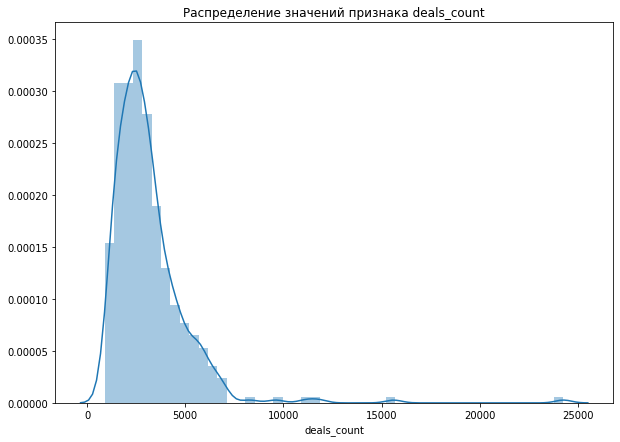

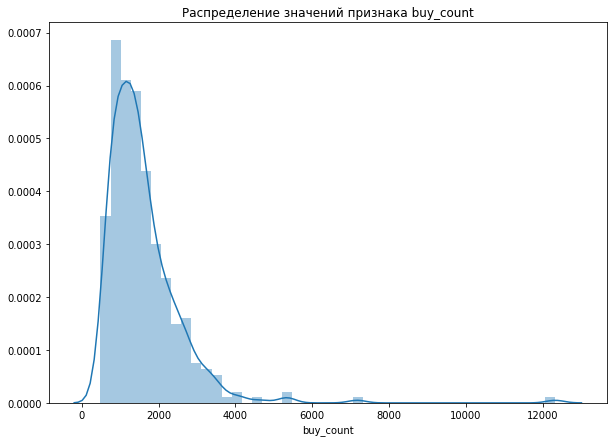

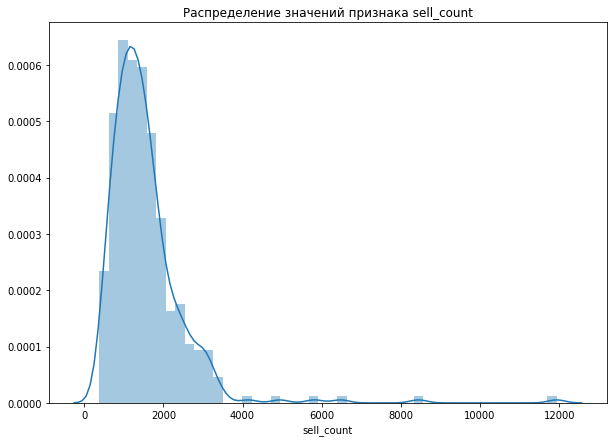

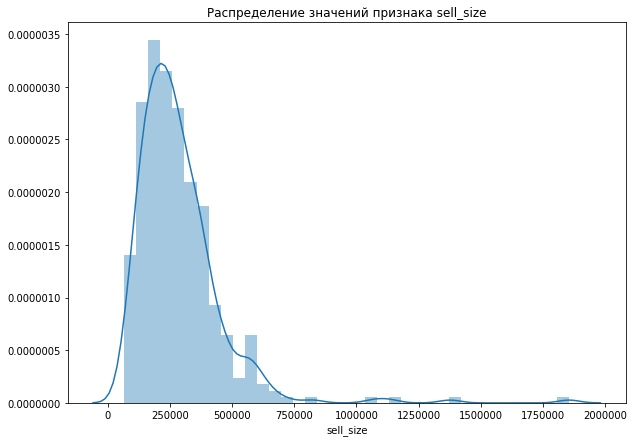

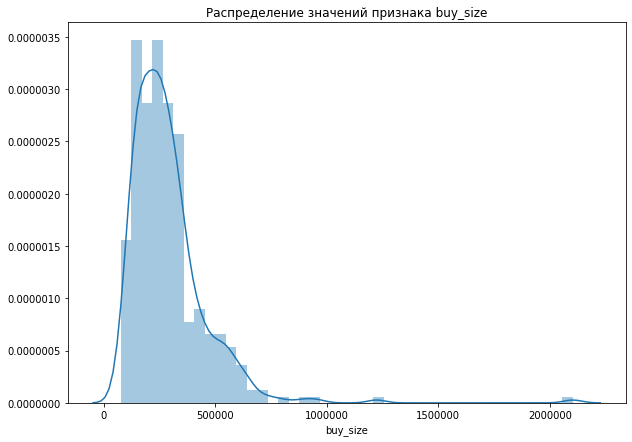

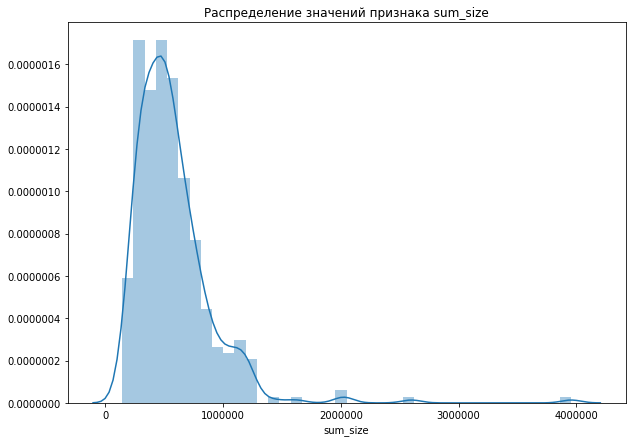

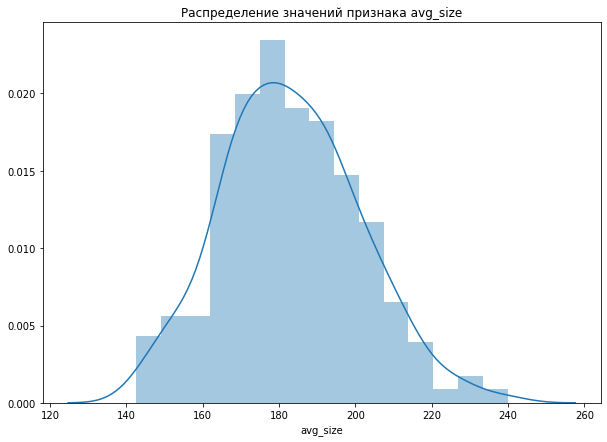

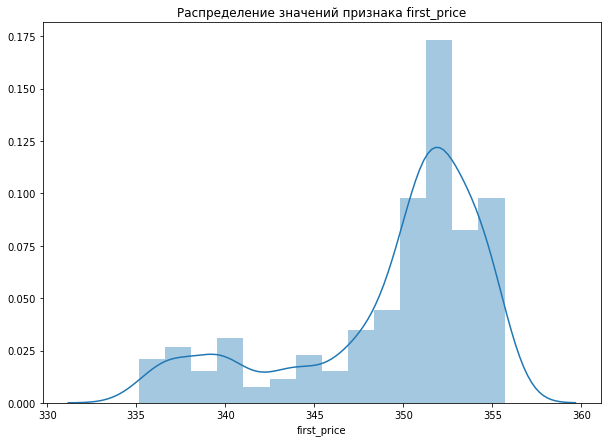

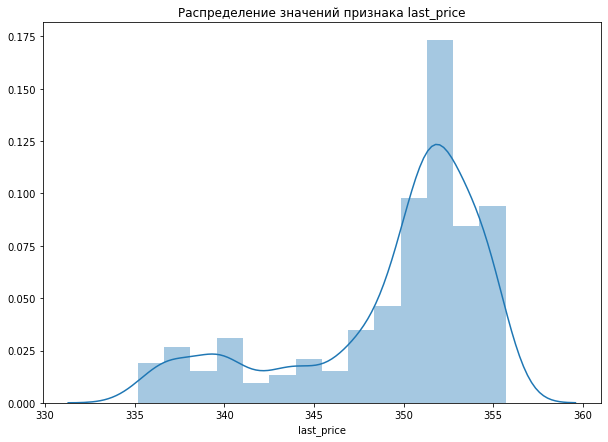

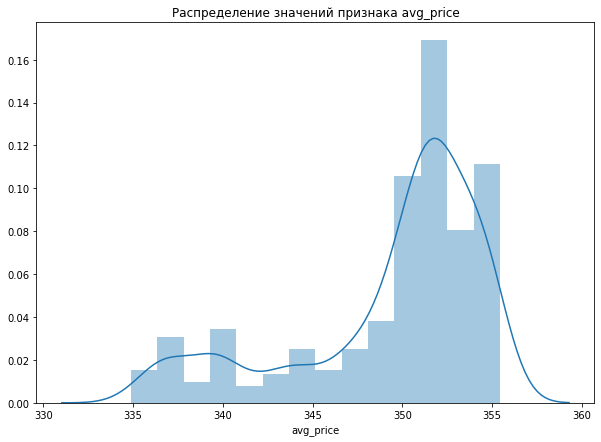

In [25]:
#построим графики распределения данных, при этом удалим из данных столбец с датой
for column in new_df.drop(['index','date'], axis='columns'):
    fig = plt.gcf()
    fig.set_size_inches(10, 7)
    sns.distplot(df[column])
    plt.title('Распределение значений признака '+ str(column))
    plt.show()
    



Среднее количесвто совершенных сделок за период составляет 3158, стандартное отклонение отклонение 2020 сделок, минимально совершено 912 сделок, максимально 24264 сделки. В среднем количество сделок sell меньше на 3,7% количества сделок buy. Средняя изначальная цена и окончательная различаются на 0,0002%, при этом окончательная цена ниже на указанное значение. 
Что касается распределения признаков. Средннее количество сделок имеет нормальное распределение, а средняя цена смещена вправо. 

,deals_count,buy_count,sell_count,sell_size,buy_size,sum_size,avg_size,first_price,last_price,avg_price
deals_count,1.000000,0.989575,0.989780,0.968503,0.970868,0.982193,-0.080653,-0.145346,-0.137660,-0.132998
buy_count,0.989575,1.000000,0.958922,0.938819,0.979451,0.971673,-0.082022,-0.138189,-0.121741,-0.121064
sell_count,0.989780,0.958922,1.000000,0.977999,0.942425,0.972433,-0.077641,-0.149447,-0.150593,-0.142083
sell_size,0.968503,0.938819,0.977999,1.000000,0.949424,0.987054,0.083164,-0.176275,-0.177330,-0.169383
buy_size,0.970868,0.979451,0.942425,0.949424,1.000000,0.987494,0.081487,-0.164553,-0.147404,-0.147293
sum_size,0.982193,0.971673,0.972433,0.987054,0.987494,1.000000,0.083379,-0.172560,-0.164330,-0.160283
avg_size,-0.080653,-0.082022,-0.077641,0.083164,0.081487,0.083379,1.000000,-0.185164,-0.179761,-0.182321
first_price,-0.145346,-0.138189,-0.149447,-0.176275,-0.164553,-0.172560,-0.185164,1.000000,0.994733,0.997763
last_price,-0.137660,-0.121741,-0.150593,-0.177330,-0.147404,-0.164330,-0.179761,0.994733,1.000000,0.998478
avg_price,-0.132998,-0.121064,-0.142083,-0.169383,-0.147293,-0.160283,-0.182321,0.997763,0.998478,1.000000


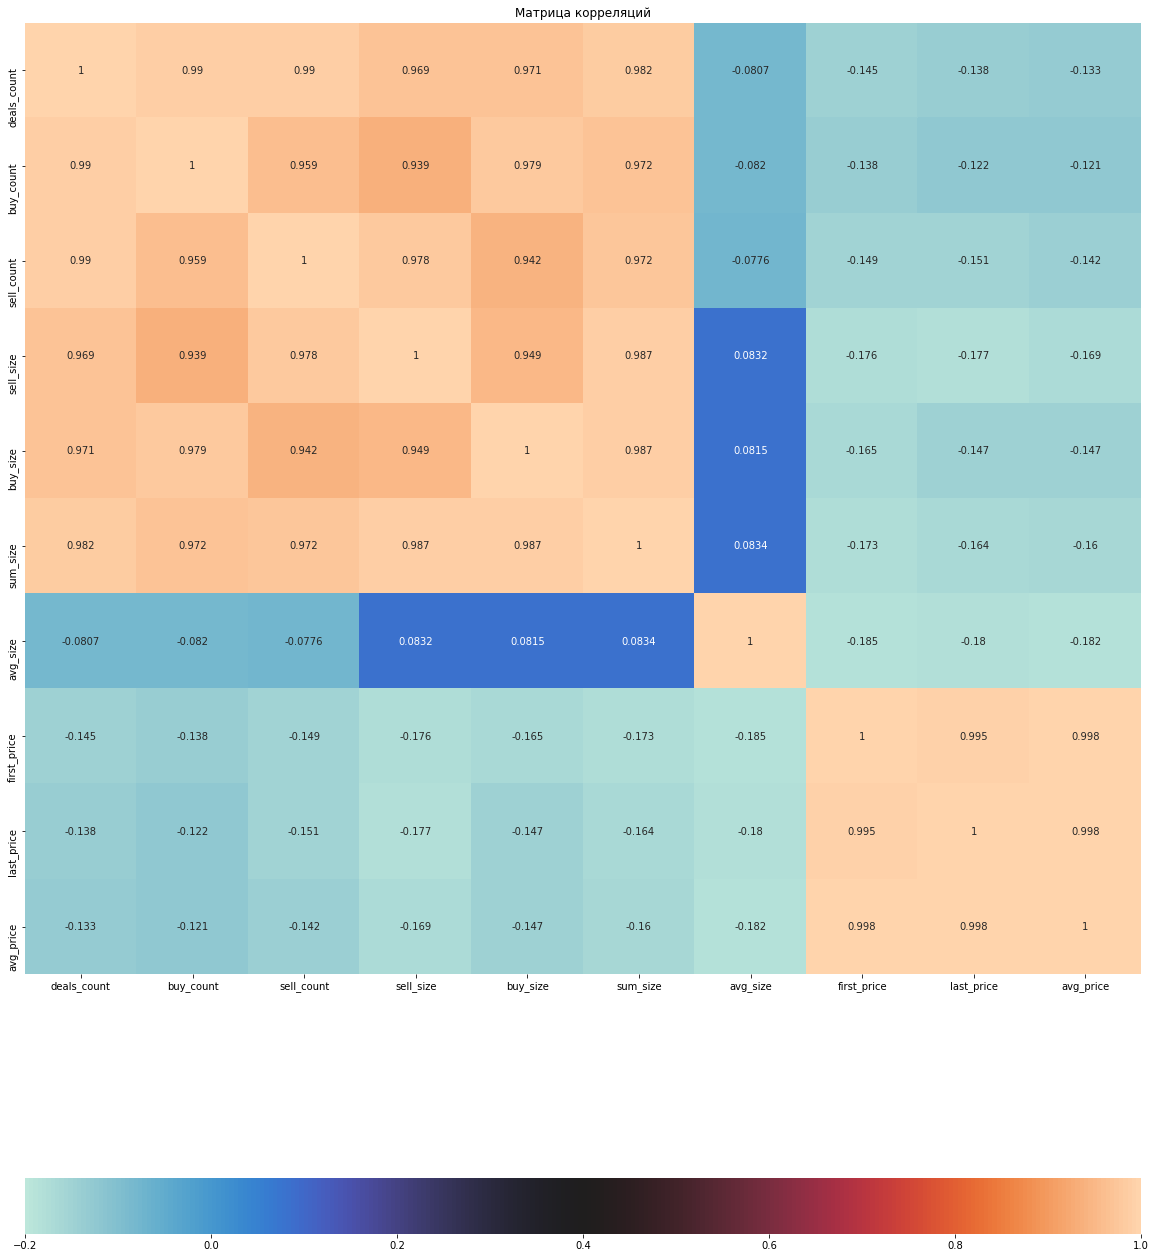

In [41]:
#построим матрицу корреляций 
cm = new_df.drop(['index','date'], axis='columns').corr()
display(cm)
fig, ax = plt.subplots()
fig.set_size_inches(20, 25)
sns.heatmap(cm, annot = True, fmt='.3g', vmin=-0.2, vmax=1, center=0.4, cbar_kws= {'orientation': 'horizontal'})
plt.title('Матрица корреляций')
plt.show()

Количесво сделок и сумма сделок имеют с ценой обратную зависимость, то есть чем больше сделок и сумма сделки, тем меньше цена. Сильную прямую зависимость имеют параметры количество сделок и сумма сделки, чем больше количсетво сделок, тем больше сумма. 

# Общий вывод

Для построения корреляционной матрицы были отобраны признаки, которые влияют на цену и не являются мультиколлинеарными, то есть сильно зависимыми, как например разница цен, %соотношения, дисперсии или стандартные отклонения. Что касается прогнозирования цены, то в данном случае бы использовала модель линейной регрессии, но так как учтено мало признаков, влияющих на цену, считаю что ошибка прогнозирования будет достаточно высокой. 